Evaluate Graph models 

In [1]:
import os
import re
import networkx as nx
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from fuzzywuzzy import process
from absl import logging


In [30]:
dataset = "Thunderbird"
G = nx.read_gpickle('models/'+dataset+'_Bigram.gpickle')
# G = nx.read_gpickle("models/" + dataset + "sim.gpickle")
#



In [24]:
for node in sorted(G.nodes()):
    print(node)
len(G.nodes())


<*> DELL <*>
<*> Exp
<*> Net filter core team
<*> Release Date E<*> T <*>
<*> SCSI revision <*>
<*> USB HID core driver
<*> admin <*> relay <*> local host
<*> cache <*>
<*> egistering net filter hooks
<*> ioc <*> initial <*>
<*> mouse device common for all mice
<*> port <*> irq <*>
<*> root ddr root <*> delay <*> delay <*> mailer relay pri <*> relay <*> stat Deferred Connection refused <*>
<*> startup succeeded
<*> t startup succeeded
<*> tarting
Assuming <*> MHz system bus speed for PIO modes override with ide bus
Auto detecting RAID arrays
Cannot open file dev log surfer for writing such file directory
CentOS <*> Kernel Module GPG key
Changing permissions special file dev log surfer
Compressed image found block <*>
Creating Top spin dev entries
DHCP <*> from <*> via eth <*>
DHCP <*> via eth <*>
DHCP DISCOVER from <*> via eth <*><*>
DHCP REQUEST for <*> from <*> via eth <*><*>
Detected <*> MHz processor
Device dev sda Temperature changed <*> Celsius <*> Celsius since last report
Disab

129

Comparing one to one values from our templates to swisslog using  Levenshtein Distance 

In [25]:
def compare_templates(path):
    df = pd.read_csv(path)
    df.pop(df.columns[0])
    your_list = df.EventTemplate.to_list()
    sim_dict = {}
    results, sim_list = [], []
    for element in G.nodes():
        a = process.extractOne(element, your_list)  ##COMPARING LINE BY LINE
        sim_dict[element] = a
        results.append(list(a)[1])
        sim_list.append(element)
        sim_list.append(list(a)[0])
    print(" The average similarity between both document is ", np.average(results))
    return sim_list


sim_list = compare_templates(
    "logs/" + dataset + "/" + dataset + "_2k.log_templates.csv"
)



 The average similarity between both document is  92.94573643410853


In [26]:
sim_list


['Cannot open file dev log surfer for writing such file directory',
 'Cannot open file /dev/logsurfer for writing (No such file or directory)',
 '<*> admin <*> relay <*> local host',
 '<*>: from=root, size=<*>, class=<*>, nrcpts=<*>, msgid=<<*>>, relay=#<*>#@localhost',
 'Starting permissive mode',
 'Starting in permissive mode',
 'not detected',
 'RNG not detected',
 'Using for IRQ routing',
 'Using ACPI for IRQ routing',
 'assuming drive cache write through',
 'assuming drive cache: write through',
 'eth <*> watchdog NIC Link <*> Mbps Full Duplex',
 'allocating divert_blk for eth<*>',
 'Disabled runtime',
 'Disabled at runtime.',
 'time reset <*>',
 'time reset +<*>.<*> s',
 'Subsystem revision <*>',
 'Subsystem revision <*>',
 'Trace cache <*> ops <*> cache <*>',
 'Trace cache: <*> uops, L1 D cache: <*>',
 'unable qualify own domain name admin <*> using short name',
 'unable to qualify my own domain name (<*>) -- using short name',
 "Now running <*> ' privileges",
 "Now running on #

Now we compare semantic similariy visualizing in a heatmap the first 10 templates using sentence encoder model from google

In [27]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"  # @param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print("module %s loaded" % module_url)


def embed(input):
    return model(input)



module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


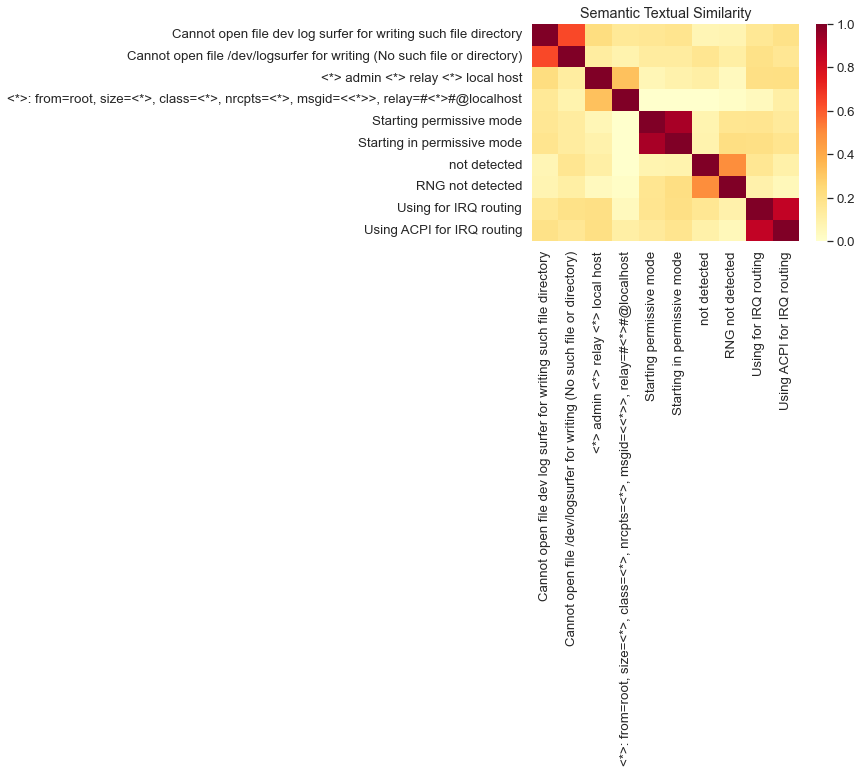

In [28]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
        corr, xticklabels=labels, yticklabels=labels, vmin=0, vmax=1, cmap="YlOrRd"
    )
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")


def run_and_plot(messages_):
    message_embeddings_ = embed(messages_)
    plot_similarity(messages_[0:10], message_embeddings_[0:10], 90)


run_and_plot(sim_list)


Betweenes centrality  to measure  to identify nodes that play a central role in the communication structure of a graph. From this we gathered the nodes in the case of the bigrams graph the most frequents and for the semantic similarity graph we understand the  actions that are most done in the systems gaining more insights in the system

In [31]:
# get words corresponding to nodes (in scoring order)
node_scores = nx.betweenness_centrality(G)
sorted_node_scores = dict(sorted(node_scores.items(), key=lambda item: -item[1]))
sorted_nodes = list(sorted_node_scores.keys())

# candidate KW = highest scoring nodes (1/3 of all nodes)
candidate_kw = sorted_nodes[: int(len(sorted_nodes) / 3)]
candidate_kw


['data thread got not answer from any nder bird <*> data source',
 'synchronized <*> stratum <*>',
 'Registered protocol family <*>',
 'not allocating divert for non ethernet device<*> ',
 'synchronized <*> <*> stratum <*>',
 'CentOS <*> Kernel Module GPG key',
 'supports <*>',
 '<*> <*> DELL <*>',
 '<*> USB HID core driver',
 'probe ves afb <*> failed with error <*>',
 'eth <*> probe Intel PRO <*> Network Connection',
 'succeeded',
 'registered new driver usb<*> ',
 'registered new driver <*> b',
 'floppy controllers found',
 'registered new driver <*> ',
 'net Version <*> started with lib wrap load avg options compiled',
 'not detected',
 'removing <*> time',
 'Creating Top spin dev entries',
 '<*> DELL <*>',
 'Wait for ready failed before probe',
 'Using PET based timekeeping',
 'Assuming <*> MHz system bus speed for PIO modes override with ide bus',
 'Using <*> MHz PET timer',
 'Unknown <*> arg ffff <*> dev sda',
 'Detected <*> MHz processor',
 '<*> Net filter core team',
 'Using s

In [32]:
[n for n in G.neighbors(candidate_kw[0])]


['root run parts etc hourly',
 'session closed for user root',
 'synchronized <*> stratum <*>',
 'synchronized <*> <*> stratum <*>',
 'sweep <*> configuration change required',
 'Local disconnected Connection closed',
 'sweep <*> NEW SWEEP',
 'sweep <*> topology change',
 '<*> <*> root ddr root <*> delay <*> delay <*> mailer relay pri <*> relay <*> stat Deferred Connection refused <*>',
 'unable qualify own domain name admin <*> using short name',
 '<*> root ddr root <*> delay <*> delay <*> mailer relay pri <*> relay <*> stat Deferred Connection refused <*>',
 'DHCP DISCOVER from <*> via eth <*> network net free leases',
 'DHCP <*> <*> via eth <*>',
 'update var lib ganglia rds <*>  illegal attempt update using time <*> when last update time <*> minimum one second step',
 'update var lib ganglia rds Nodes <*> kts out illegal attempt update using time <*> when last update time <*> minimum one second step',
 'Received SNMP packet from <*>',
 'kernel time sync <*> abled <*>',
 'session op

function return  The Jaccard coefficient  used to identify similar vertices in the graph, community detection and link prediction. 

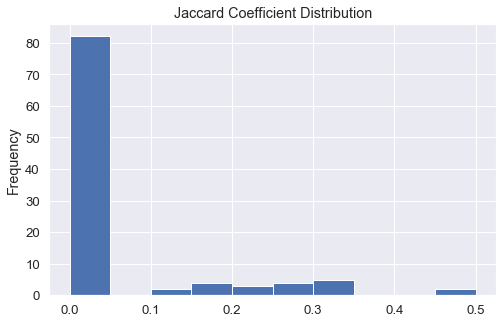

In [10]:
def get_jaccard_coefficients(graph):
    return pd.DataFrame(
        sorted(list(nx.jaccard_coefficient(graph)), key=lambda x: x[-1], reverse=True),
        columns=["source", "target", "jaccard_coefficient"],
    )


jaccard_coefficients_df = get_jaccard_coefficients(G)
try:
    jaccard_coefficients_df.jaccard_coefficient.plot.hist(
        bins=10, figsize=(8, 5), title="Jaccard Coefficient Distribution"
    )
except:
    print("Strongly connected graph")


Link predicion : We get common neigbors betweeen two nodes and visualize it
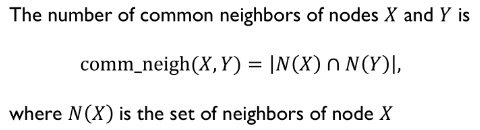

In [11]:
# function to return the subgraph containing 2 nodes' common neighbors
def get_common_neighbor_subgraph(graph, source, target):
    nodes = [source, target] + list(nx.common_neighbors(G, source, target))
    return graph.subgraph(nodes)


# function create node color list for likely connected two nodes with their
# common neighbors
def create_source_target_colors(graph, source, target):
    nodes = list(graph.nodes())
    potential_connected_node_colors = ["#EFD1BB"] * len(nodes)
    for index in range(len(nodes)):
        if nodes[index] in [source, target]:
            potential_connected_node_colors[index] = "#F47315"
    return potential_connected_node_colors


def visualize_likely_connected_nodes(graph, source, target):
    # get subgraph
    subgraph = get_common_neighbor_subgraph(G, source, target)

    # create visualization
    node_colors = create_source_target_colors(subgraph, source, target)
    title = dataset + f" Graph {source} and {target}"
    pos = nx.spring_layout(subgraph, k=0.3, iterations=50, seed=2)

    plt.figure(1, figsize=(10, 6))
    nx.draw(
        subgraph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )
    plt.title(title)
    plt.show()


In [12]:
# function to return a node's neighbor nodes as a list
def get_neighbors(graph, node):
    return [n for n in graph.neighbors(node)]


get_neighbors(G, candidate_kw[1])


['Received block <*> size <*><*>',
 'Packet Responder <*> for block <*> terminating',
 'Served block <*>',
 'Starting thread transfer block <*>']

In [13]:
jaccard_coefficients_df.head(10)



,source,target,jaccard_coefficient
0,Served block <*>,Received block <*> size <*><*>,0.500000
1,Received block <*> size <*><*>,BLOCK Name System delete <*> added invalid Set,0.500000
2,Verification succeeded for <*>,Starting thread transfer block <*>,0.333333
3,Starting thread transfer block <*>,Served block <*>,0.333333
4,Starting thread transfer block <*>,BLOCK ask replicate <*> data node,0.333333
5,Packet Responder <*> for block <*> terminating,BLOCK Name System allocate Block user root <*>...,0.333333
6,Packet Responder <*> for block <*> terminating,BLOCK Name System allocate Block user root ran...,0.333333
7,BLOCK Name System allocate Block user root <*>...,Verification succeeded for <*>,0.250000
8,Verification succeeded for <*>,Receiving block <*>,0.250000
9,Verification succeeded for <*>,BLOCK Name System allocate Block user root ran...,0.250000


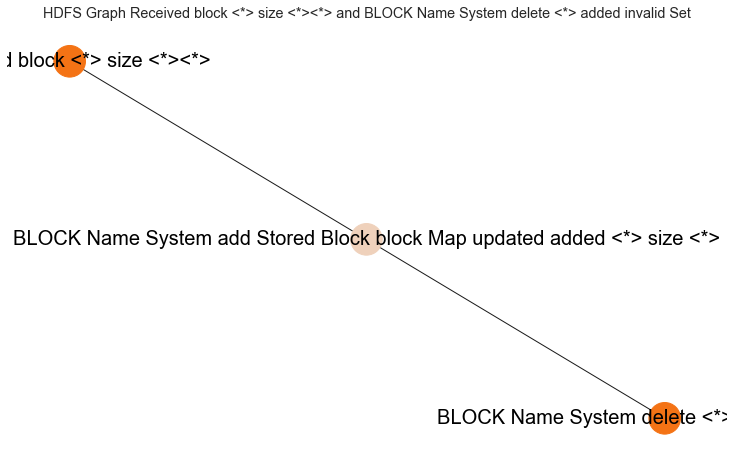

In [14]:
visualize_likely_connected_nodes(
    G, jaccard_coefficients_df.source[1], jaccard_coefficients_df.target[1]
)



resource allocation index for link predicrion,  One observation is that two potentially connected nodes with many connections will have resource allocation index greater than 1 when their neighbors have less common neighbors. In this way, the percentage of resources allocated will be higher per common neighbor nodes.

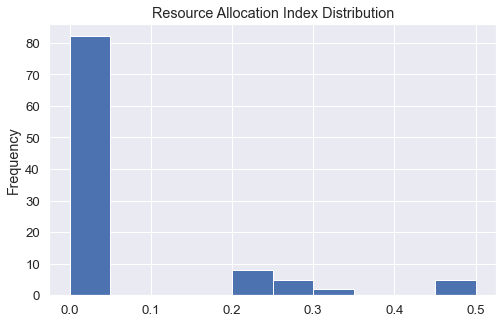

In [15]:
# function return the resource allocation index dataframe sorted by the
# resource allocation index value
def get_resource_allocation_index(graph):
    return pd.DataFrame(
        sorted(
            list(nx.resource_allocation_index(graph)), key=lambda x: x[-1], reverse=True
        ),
        columns=["source", "target", "resource_allocation_index"],
    )


resource_allocation_index_df = get_resource_allocation_index(G)
if len(resource_allocation_index_df) > 1:
    resource_allocation_index_df.resource_allocation_index.plot.hist(
        bins=10, figsize=(8, 5), title="Resource Allocation Index Distribution"
    )
else:
    print("Strongly connected graph")


In [16]:
resource_allocation_index_df.head()
resource_allocation_index_df.to_clipboard()


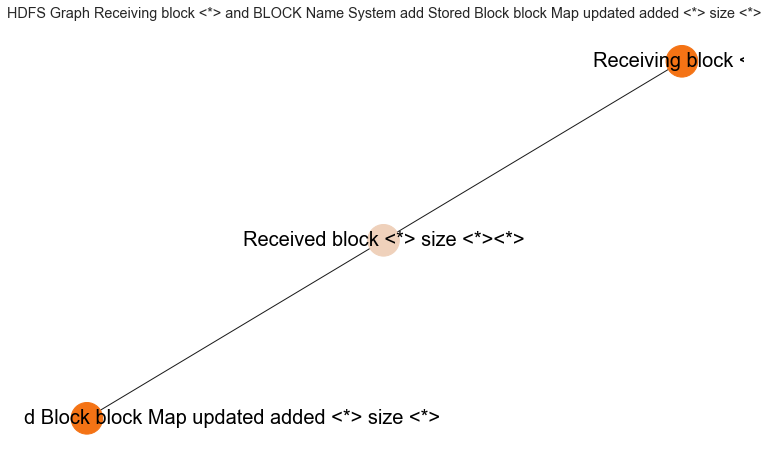

In [17]:
visualize_likely_connected_nodes(
    G, resource_allocation_index_df.source[0], resource_allocation_index_df.target[0]
)



In [18]:
def get_graph_info(graph):
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())
    print("Average Cluster Coefficients:", nx.average_clustering(graph))
    print("Connected components:", len(list(nx.connected_components(graph))))


get_graph_info(G)


Number of nodes: 16
Number of edges: 18
Average Cluster Coefficients: 0.2520833333333333
Connected components: 3


In [19]:
import networkx.algorithms.community as nx_comm

# function create node color list for less than 7 communities
# when there are more than 6 colors, visualization can be confusing for human
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = [
        "#EF9A9A",
        "#BA68C8",
        "#64B5F6",
        "#81C784",
        "#FFF176",
        "#BDBDBD",
    ] * number_of_colors
    node_colors = []

    # iterate each node in the graph and find which community it belongs to
    # if the current node is found at a specific community, add color to the
    # node_colors list
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


def visualize_communities(graph, communities):
    # create visualization
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx_comm.modularity(graph, communities), 11)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)

    plt.figure(1, figsize=(10, 6))
    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=False,
        font_size=20,
        font_color="black",
    )
    plt.title(title)
    plt.show()


In [20]:
from networkx.algorithms.community import greedy_modularity_communities

c = greedy_modularity_communities(G)
c[0]


frozenset({'BLOCK Name System add Stored Block block Map updated added <*> size <*>',
           'BLOCK Name System delete <*> added invalid Set',
           'Received block <*> size <*><*>',
           'Receiving block <*>',
           'Served block <*>'})

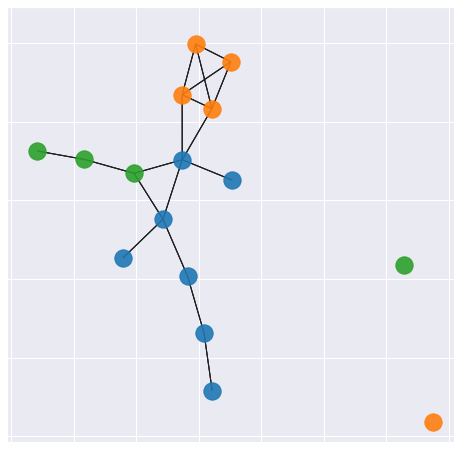

In [21]:
# list of detected communities
c = list(greedy_modularity_communities(G))
sortedCommunities = []

# iterate through list of discovered communities. Sort each community and add them to new list.

for community in c:
    sortedCommunities.append(sorted(community))

# draw community
# here we are using a different color at each iteration but cycling back to the first color.

community_to_color = {
    0: "tab:blue",
    1: "tab:orange",
    2: "tab:green",
    3: "tab:red",
}
temp_counter = 0
pos = nx.nx_agraph.graphviz_layout(G)
# color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
# pos = nx.multipartite_layout(G, subset_key="layer")
plt.figure(figsize=(8, 8))
for community in sortedCommunities:

    chosenColor = community_to_color[temp_counter % 3]
    temp_counter += 1
    nx.draw_networkx_nodes(
        G, pos, nodelist=community, label=True, node_color=chosenColor, alpha=0.9
    )
    nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


In [22]:
sortedCommunities


[['BLOCK Name System add Stored Block block Map updated added <*> size <*>',
  'BLOCK Name System delete <*> added invalid Set',
  'Received block <*> size <*><*>',
  'Receiving block <*>',
  'Served block <*>'],
 ['BLOCK Name System allocate Block user root <*> rand temporary task <*> part <*>',
  'BLOCK Name System allocate Block user root <*> temporary task <*> part <*>',
  'BLOCK Name System allocate Block user root rand <*> temporary task <*> part <*>',
  'BLOCK Name System allocate Block user root rand t<*> emporary task <*> part <*>'],
 ['BLOCK ask replicate <*> data node',
  'Deleting block <*> file had oop data current <*>',
  'Starting thread transfer block <*>'],
 ['Packet Responder <*> for block <*> terminating',
  'Verification succeeded for <*>'],
 ['BLOCK ask delete <*>'],
 ['Got exception while serving <*>']]